In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Q4. Are there any significant differences in pickups on holidays compared to regular days?

In [13]:
uber_weather_df = pd.read_csv("Resources/clean.csv")
uber_weather_df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temprature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [3]:
uber_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_dt           26064 non-null  object 
 1   hour                26064 non-null  int64  
 2   month               26064 non-null  object 
 3   borough             26064 non-null  object 
 4   pickups             26064 non-null  float64
 5   Wind speed          26064 non-null  float64
 6   Visibility          26064 non-null  float64
 7   Temprature          26064 non-null  float64
 8   dew point           26064 non-null  float64
 9   Sea level pressure  26064 non-null  float64
 10  Precipitation 01    26064 non-null  float64
 11  Precipitation 06    26064 non-null  float64
 12  Precipitation 24    26064 non-null  float64
 13  Snow depth          26064 non-null  float64
 14  Holiday             26064 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 3.0

In [4]:
uber_weather_df['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [5]:
#GROUP THE DATA BY HOLYDAY AND REGULAR DAY
# Group the data by holiday
holiday_group = uber_weather_df[uber_weather_df['Holiday'] == 'Y']
holiday_group.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temprature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,32.252778,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [6]:
#GROUP BY REGULAR DAYS
regular_day_group = uber_weather_df[uber_weather_df['Holiday'] != 'Y']
regular_day_group.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temprature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
144,2015-01-02 00:00:00,0,January,Bronx,24.0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
145,2015-01-02 00:00:00,0,January,Brooklyn,331.0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
146,2015-01-02 00:00:00,0,January,EWR,0.0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
147,2015-01-02 00:00:00,0,January,Manhattan,808.0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N
148,2015-01-02 00:00:00,0,January,Queens,220.0,0.0,10.0,39.0,13.0,1015.3,0.0,0.0,0.0,0.0,N


In [7]:
print(f'Number of regular days : {len(regular_day_group)}')
print(f'Number of Holidays : {len(holiday_group)}')

Number of regular days : 25056
Number of Holidays : 1008


In [8]:
# Calculate the mean pickups for each group
mean_pickups_holiday = holiday_group['pickups'].mean()
mean_pickups_regular = regular_day_group['pickups'].mean()
print(f'Mean Holydays {mean_pickups_holiday}')
print(f'Mean Regular Days {mean_pickups_regular}')

Mean Holydays 488.046626984127
Mean Regular Days 549.5552362707535


In [9]:
# Perform a t-test to check for significance
from scipy import stats
#running a t-test to see significance 
t_stat, p_value = stats.ttest_ind(holiday_group['pickups'], regular_day_group['pickups'])
# Define a significance level (e.g., 0.05)
alpha = 0.05
# Compare the p-value to the significance level
if p_value < alpha:
    significance_result = "There is a significant difference"
else:
    significance_result = "There is no significant difference"
print(f"t-test value: {t_stat}") 
print(f" P Value: {p_value}")
significance_result

t-test value: -1.8460868817315839
 P Value: 0.06489092381741797


'There is no significant difference'

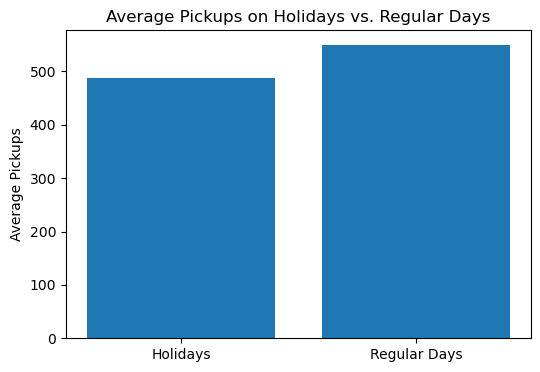

In [10]:
# Create a bar plot to visualize the comparison
plt.figure(figsize=(6, 4))
plt.bar(['Holidays', 'Regular Days'], [mean_pickups_holiday, mean_pickups_regular])
plt.title("Average Pickups on Holidays vs. Regular Days")
plt.ylabel("Average Pickups")
plt.show()


In [11]:
# Print the results
print(significance_result)
print("Mean pickups on holidays:", mean_pickups_holiday)
print("Mean pickups on regular days:", mean_pickups_regular)

There is no significant difference
Mean pickups on holidays: 488.046626984127
Mean pickups on regular days: 549.5552362707535


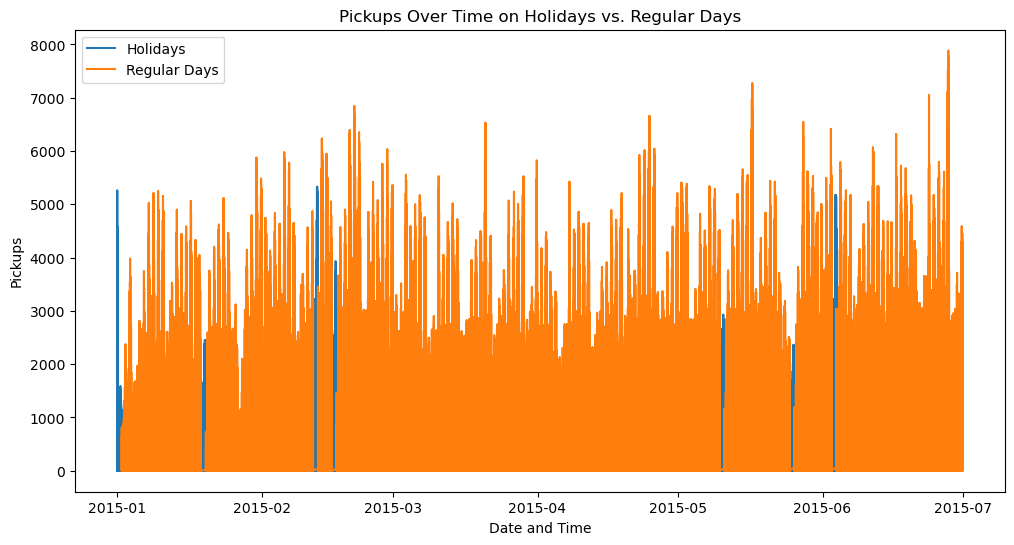

In [12]:
#Time Analysis
#this is a time series plot created by using multiple time periods, 
#This chart helps to visualize how pickups vary over time for both holidays and regular days.

uber_weather_df['pickup_dt'] = uber_weather_df['pickup_dt'].astype('datetime64')
plt.figure(figsize=(12, 6))
plt.plot(uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickups'], label='Holidays')
plt.plot(uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickups'], label='Regular Days')
plt.title("Pickups Over Time on Holidays vs. Regular Days")
plt.xlabel("Date and Time")
plt.ylabel("Pickups")
plt.legend()
plt.show()